<a href="https://colab.research.google.com/github/JenFaith/data/blob/master/Heart_Disease_%26_Violent_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prepping Coronary Heart Disease Data

In [ ]:
import pandas as pd
import numpy as np
heart = pd.read_csv('500_Cities__Coronary_heart_disease_among_adults_aged___18_years.csv')
heart.head()
print(heart.shape)
print(heart.isnull().sum())

(29006, 9)
Year                       0
StateAbbr                  0
StateDesc                  0
CityName                   2
Data_Value_Type            0
Data_Value               794
Low_Confidence_Limit     794
High_Confidence_Limit    794
PopulationCount            0
dtype: int64


In [ ]:
heart= heart.dropna(how='any',axis=0)
print(heart.shape)
print(heart.isnull().sum())

(28210, 9)
Year                     0
StateAbbr                0
StateDesc                0
CityName                 0
Data_Value_Type          0
Data_Value               0
Low_Confidence_Limit     0
High_Confidence_Limit    0
PopulationCount          0
dtype: int64


In [ ]:
heart['CityName_ST'] = heart['CityName'] + '_' + heart['StateAbbr']

In [ ]:
heart.head()

,Year,StateAbbr,StateDesc,CityName,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,PopulationCount,CityName_ST
0,2017,TX,Texas,Abilene,Crude prevalence,5.1,4.6,5.5,"2,400",Abilene_TX
1,2017,TX,Texas,Abilene,Crude prevalence,6.8,6.1,7.5,"3,694",Abilene_TX
2,2017,TX,Texas,Abilene,Crude prevalence,5.4,5.1,5.7,"4,482",Abilene_TX
3,2017,TX,Texas,Abilene,Crude prevalence,5.2,4.9,5.5,"2,516",Abilene_TX
4,2017,TX,Texas,Abilene,Crude prevalence,7.8,7.2,8.4,"2,307",Abilene_TX


In [ ]:
##Averaging together the different instances of reported data per city
heart_gr = heart.groupby(['CityName_ST'])
heart_average = heart_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
heart_average.head()

,CityName_ST,% of Disease Prevalence
0,Abilene_TX,6.289744
1,Akron_OH,7.883824
2,Alameda_CA,4.355556
3,Albany_GA,7.081481
4,Albany_NY,5.442857


## Prepping Crime Data

In [ ]:
# fbi = pd.read_csv('FBI_data_project_2.csv')
# fbi = fbi.drop('Metropolitan Statistical Area', 1)
fbi = pd.read_csv('FBI data_edit.csv')
print(fbi.shape)
fbi[fbi['Counties/principal cities']=='City of Chicago']

(2202, 12)


,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft
374,IL,City of Chicago,2719151,27357,563,"1,798","9,684","15,312","86,513","11,686","64,695","10,132"


In [ ]:
city_crime = fbi[fbi['Counties/principal cities'].str.contains('City of ', na=False)].reset_index()
city_crime.shape
city_crime= city_crime.dropna(how='any',axis=0)
city_crime.isnull().sum()
city_crime.shape

(557, 13)

In [ ]:
x = 'City of Chicago'
# x.replace(x[:8], '')

def drop_extras(mylist):
   "This changes a passed list into this function"
   return mylist.replace(x[:8], '')


In [ ]:
## Scraping off "City of" so I can match dataframes
city_crime['Counties/principal cities'] = city_crime['Counties/principal cities'].apply(drop_extras)
# city_crime['Counties/principal cities'] = city_crime['Counties/principal cities'].str.strip('City of')
city_crime["Population"] = pd.to_numeric(city_crime["Population"], downcast="float")
city_crime["Violent\rcrime"] = pd.to_numeric(city_crime["Violent\rcrime"], downcast="float")
city_crime['Violent Crime Per 100'] = (city_crime['Violent\rcrime']/city_crime['Population'])*100
city_crime.head(5)
#city_crime[city_crime['Counties/principal cities']=='Chicago']
city_crime.head()

,index,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,2,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,7,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,13,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,19,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,20,NY,Schenectady,65550.0,620.0,1,57,136,426,"2,106",353,"1,542",211,0.945843


In [ ]:
city_crime['CityName_ST'] = city_crime['Counties/principal cities'] + '_' + city_crime['STATE']
city_crime.head()

,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100,CityName_ST
0,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528,Abilene_TX
1,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956,Akron_OH
2,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417,Albany_GA
3,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046,Albany_NY
4,NY,Schenectady,65550.0,620.0,1,57,136,426,"2,106",353,"1,542",211,0.945843,Schenectady_NY


## Merging and Analyzing Crime + Heart Disease

In [ ]:
heart_crime = pd.merge(heart_average, city_crime, on='CityName_ST')
heart_crime.shape

(267, 15)

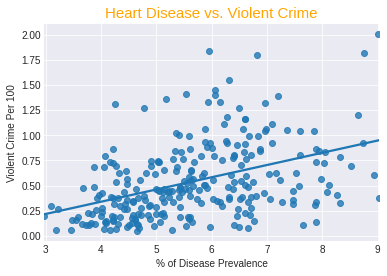

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Heart Disease vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

ax1 = sns.regplot(x = heart_crime['% of Disease Prevalence'], y = heart_crime['Violent Crime Per 100'], data = heart_crime, ci=None)

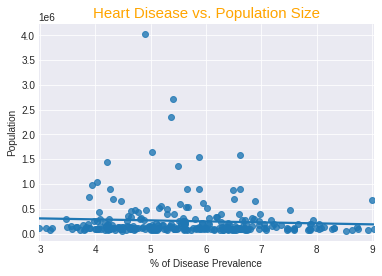

In [ ]:
plt.style.use('seaborn-darkgrid')
plt.title("Heart Disease vs. Population Size", fontsize=15, fontweight=5, color='orange')

ax1 = sns.regplot(x = heart_crime['% of Disease Prevalence'], y = heart_crime['Population'], data = heart_crime, ci=None)

In [ ]:
import numpy as np
from scipy.stats import pearsonr
corr, _ = pearsonr(heart_crime['Violent Crime Per 100'], heart_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.426


In [ ]:
corr, _ = pearsonr(heart_crime['Violent Crime Per 100'], heart_crime['Population'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.221


In [ ]:
heart_crime.nlargest(10, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
117,Largo_FL,9.024324,FL,Largo,85568.0,322.0,3,66,72,181,"2,593",282,"2,126",185,0.376309
72,Detroit_MI,9.003061,MI,Detroit,671275.0,13478.0,261,988,"2,309","9,920","28,897","7,440","15,003","6,454",2.007821
34,Boynton Beach_FL,8.930769,FL,Boynton Beach,79142.0,477.0,4,21,134,318,"2,964",256,"2,423",285,0.602714
83,Flint_MI,8.746341,MI,Flint,95677.0,1739.0,32,130,189,"1,388","2,584",796,"1,488",300,1.817574
67,Dayton_OH,8.732203,OH,Dayton,140094.0,1291.0,37,167,403,684,"6,323","1,697","3,831",795,0.921524
41,Canton_OH,8.642857,OH,Canton,70605.0,845.0,3,98,189,555,"3,790",970,"2,517",303,1.196799
49,Charleston_WV,8.525000,WV,Charleston,47470.0,331.0,10,50,48,223,"2,853",660,"1,947",246,0.697282
114,Lakeland_FL,8.312195,FL,Lakeland,109616.0,361.0,8,47,106,200,"3,417",477,"2,737",203,0.329331
176,Pompano Beach_FL,8.310714,FL,Pompano Beach,112045.0,876.0,6,91,312,467,"4,307",608,"3,121",578,0.781829
70,Deerfield Beach_FL,8.268421,FL,Deerfield Beach,81371.0,329.0,3,21,110,195,"2,490",422,"1,737",331,0.404321


There is a moderate correlation between crime and heart disease.

## Generally Sick for More Than 14 Days & Violent Crime

In [ ]:
gen_health = pd.read_csv('Cdc_General_health.csv')

In [ ]:
gen_health= gen_health.dropna(how='any',axis=0)
gen_health['CityName_ST'] = gen_health['CityName'] + '_' + gen_health['StateAbbr']
gen_health.shape
health_gr = gen_health.groupby(['CityName_ST'])
health_average = health_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
health_average.shape

(500, 2)

In [ ]:
health_crime = pd.merge(health_average, city_crime, on='CityName_ST')

In [ ]:
health_crime.shape

(267, 15)

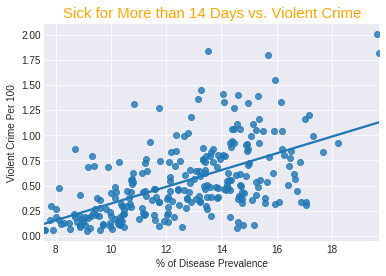

In [ ]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.title("Sick for More than 14 Days vs. Violent Crime", fontsize=15, fontweight=5, color='orange')


ax1 = sns.regplot(x = health_crime['% of Disease Prevalence'], y = health_crime['Violent Crime Per 100'], data = health_crime, ci=None)

In [ ]:
corr, _ = pearsonr(health_crime['Violent Crime Per 100'], health_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.565


There is a moderate correlation between being ill for more than 14 days and living in a higher crime area

## Athsma vs Crime

In [ ]:
athsma = pd.read_csv('500_Cities__Current_asthma.csv')
athsma.head()

,Year,StateAbbr,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2017,IL,Illinois,Decatur,10.0,9.5,10.5
1,2017,IL,Illinois,Naperville,8.3,8.0,8.8
2,2017,IL,Illinois,Cicero,8.4,8.2,8.6
3,2017,IL,Illinois,Joliet,8.8,8.4,9.2
4,2017,IL,Illinois,Palatine,7.7,7.3,8.2


In [ ]:
athsma= athsma.dropna(how='any',axis=0)
athsma['CityName_ST'] = athsma['CityName'] + '_' + athsma['StateAbbr']
athsma_gr = athsma.groupby(['CityName_ST'])
athsma_average = athsma_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
athsma_average.head()

,CityName_ST,% of Disease Prevalence
0,Abilene_TX,8.900000
1,Akron_OH,10.997059
2,Alameda_CA,8.422222
3,Albany_GA,11.374074
4,Albany_NY,10.917857


In [ ]:
athsma_crime = pd.merge(athsma_average, city_crime, how='inner', on = 'CityName_ST')
athsma_crime.head()

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,Abilene_TX,8.900000,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,10.997059,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,11.374074,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,10.917857,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,10.014388,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


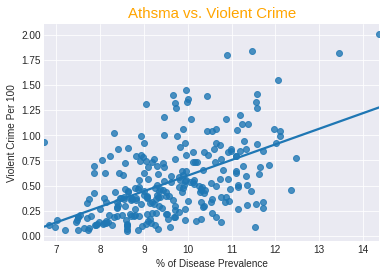

In [ ]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.title("Athsma vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

ax1 = sns.regplot(x = athsma_crime['% of Disease Prevalence'], y = athsma_crime['Violent Crime Per 100'], data = athsma_crime, ci=None)

In [ ]:
corr, _ = pearsonr(athsma_crime['Violent Crime Per 100'], athsma_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.528


In [ ]:
athsma_crime.nlargest(10, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
72,Detroit_MI,14.368027,MI,Detroit,671275.0,13478.0,261,988,"2,309","9,920","28,897","7,440","15,003","6,454",2.007821
83,Flint_MI,13.456098,MI,Flint,95677.0,1739.0,32,130,189,"1,388","2,584",796,"1,488",300,1.817574
191,Rochester_NY,12.462963,NY,Rochester,207701.0,1615.0,29,131,516,939,"7,036","1,178","5,285",573,0.777560
181,Providence_RI,12.351220,RI,Providence,180169.0,819.0,10,109,248,452,"5,679",931,"4,196",552,0.454573
37,Buffalo_NY,12.108642,NY,Buffalo,258219.0,2692.0,57,167,907,"1,561","9,852","2,271","6,707",874,1.042526
227,Springfield_MA,12.107692,MA,Springfield,155179.0,1534.0,19,104,475,936,"4,089",910,"2,752",427,0.988536
263,Wilmington_DE,12.065385,DE,Wilmington,71157.0,1099.0,23,14,358,704,"3,502",567,"2,483",452,1.544472
67,Dayton_OH,12.023729,OH,Dayton,140094.0,1291.0,37,167,403,684,"6,323","1,697","3,831",795,0.921524
97,Hartford_CT,11.976190,CT,Hartford,123117.0,1313.0,21,53,355,884,"4,435",605,"3,089",741,1.066465
238,Syracuse_NY,11.866667,NY,Syracuse,143129.0,1006.0,23,92,285,606,"4,420",831,"3,083",506,0.702862


There's a moderate correlation between athsma & violent crime in towns.

## Mental Health & Violent Crime

In [ ]:
mental = pd.read_csv('500_Cities__Mental_health_not_good_for___14_days_among_adults_aged___18_years.csv')
mental.head()

,Year,StateAbbr,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2017,IL,Illinois,Chicago,18.8,16.7,20.9
1,2017,IL,Illinois,Chicago,9.9,8.9,11.1
2,2017,IL,Illinois,Elgin,14.7,13.5,16.1
3,2017,IL,Illinois,Chicago,13.2,12.1,14.4
4,2017,IL,Illinois,Chicago,8.3,7.6,9.3


In [ ]:
mental= mental.dropna(how='any',axis=0)
mental['CityName_ST'] = mental['CityName'] + '_' + mental['StateAbbr']
mental_gr = mental.groupby(['CityName_ST'])
mental_average = mental_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
mental_average.head()

,CityName_ST,% of Disease Prevalence
0,Abilene_TX,15.053846
1,Akron_OH,17.227941
2,Alameda_CA,10.083333
3,Albany_GA,16.640741
4,Albany_NY,15.307143


In [ ]:
mental_crime = pd.merge(mental_average, city_crime, how='inner', on ='CityName_ST')

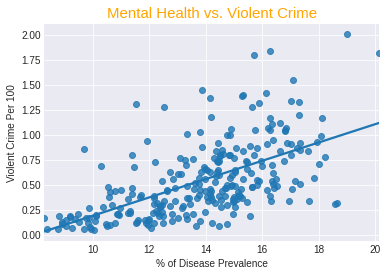

In [ ]:
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.title("Mental Health vs. Violent Crime", fontsize=15, fontweight=5, color='orange')


ax1 = sns.regplot(x = mental_crime['% of Disease Prevalence'], y = mental_crime['Violent Crime Per 100'], data = mental_crime, ci=None)

In [ ]:
corr, _ = pearsonr(mental_crime['Violent Crime Per 100'], mental_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.590


## Cancer(Excluding Skin Cancer) vs. Violent Crime

In [ ]:
cancer = pd.read_csv('500_Cities__Cancer__excluding_skin_cancer__among_adults_aged___18_years.csv')
cancer.head()
cancer = cancer.drop(['Unnamed: 7', 'Unnamed: 8','Unnamed: 9'], 1)
cancer.head()

,Year,StateAbbr,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2017,GA,Georgia,Columbus,7.9,7.6,8.2
1,2017,GA,Georgia,Columbus,5.6,5.5,5.7
2,2017,GA,Georgia,Sandy Springs,3.5,3.4,3.6
3,2017,GA,Georgia,Columbus,6.5,6.2,6.7
4,2017,GA,Georgia,Savannah,5.6,5.4,5.7


In [ ]:
cancer= cancer.dropna(how='any',axis=0)
cancer['CityName_ST'] = cancer['CityName'] + '_' + cancer['StateAbbr']
cancer_gr = cancer.groupby(['CityName_ST'])
cancer_average = cancer_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
cancer_average.head()

,CityName_ST,% of Disease Prevalence
0,Abilene_TX,5.876923
1,Akron_OH,6.320588
2,Alameda_CA,6.133333
3,Albany_GA,5.551852
4,Albany_NY,5.435714


In [ ]:
cancer_crime = pd.merge(cancer_average, city_crime, how='inner', on = 'CityName_ST')
cancer_crime.head()

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,Abilene_TX,5.876923,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,6.320588,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,5.551852,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,5.435714,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,6.064748,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


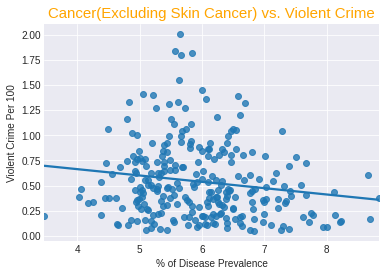

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Cancer(Excluding Skin Cancer) vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = cancer_crime['% of Disease Prevalence'], y = cancer_crime['Violent Crime Per 100'], data = cancer_crime, ci=None)

In [ ]:
corr, _ = pearsonr(cancer_crime['Violent Crime Per 100'], cancer_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.157


In [ ]:
cancer_crime.nlargest(10, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
117,Largo_FL,8.840541,FL,Largo,85568.0,322.0,3,66,72,181,"2,593",282,"2,126",185,0.376309
216,Scottsdale_AZ,8.690476,AZ,Scottsdale,254961.0,422.0,7,122,87,206,"5,683",711,"4,700",272,0.165516
34,Boynton Beach_FL,8.665385,FL,Boynton Beach,79142.0,477.0,4,21,134,318,"2,964",256,"2,423",285,0.602714
123,Livonia_MI,8.224242,MI,Livonia,93740.0,138.0,0,34,19,85,"1,313",111,"1,092",110,0.147216
153,Newport Beach_CA,8.213043,CA,Newport Beach,86276.0,124.0,1,31,29,63,"2,073",397,"1,513",163,0.143725
30,Boca Raton_FL,8.137931,FL,Boca Raton,100162.0,205.0,2,28,80,95,"2,361",277,"1,894",190,0.204668
56,Clearwater_FL,8.123684,FL,Clearwater,116504.0,510.0,6,95,105,304,"3,087",345,"2,564",178,0.437753
258,Warwick_RI,8.004348,RI,Warwick,80380.0,73.0,1,27,9,36,"1,372",136,"1,178",58,0.090819
81,Farmington Hills_MI,7.933333,MI,Farmington Hills,81239.0,69.0,1,16,9,43,681,85,554,42,0.084935
43,Carlsbad_CA,7.781818,CA,Carlsbad,116739.0,243.0,1,39,52,151,"2,100",299,"1,649",152,0.208157


## Diabetes vs. Violent Crime

In [ ]:
diabetes = pd.read_csv('500_Cities__Diagnosed_diabetes_among_adults_aged___18_years.csv')
diabetes = diabetes.drop(['Unnamed: 7', 'Unnamed: 8','Unnamed: 9'], 1)
diabetes.head()

,Year,StateAbbr,StateDesc,CityName,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2017,IL,Illinois,Chicago,9.7,9.0,10.3
1,2017,IL,Illinois,Naperville,7.0,6.4,7.6
2,2017,IL,Illinois,Chicago,19.0,17.8,20.2
3,2017,IL,Illinois,Chicago,15.9,14.4,17.2
4,2017,IL,Illinois,Chicago,10.9,10.2,11.6


In [ ]:
diabetes= diabetes.dropna(how='any',axis=0)
diabetes['CityName_ST'] = diabetes['CityName'] + '_' + diabetes['StateAbbr']
diabetes_gr = diabetes.groupby(['CityName_ST'])
diabetes_average = diabetes_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
diabetes_average.head()

,CityName_ST,% of Disease Prevalence
0,Abilene_TX,11.348718
1,Akron_OH,14.488235
2,Alameda_CA,8.233333
3,Albany_GA,15.259259
4,Albany_NY,10.167857


In [ ]:
diabetes_crime = pd.merge(diabetes_average, city_crime, how='inner', on ='CityName_ST')
diabetes_crime.head()

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,Abilene_TX,11.348718,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,14.488235,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,15.259259,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,10.167857,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,8.719424,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


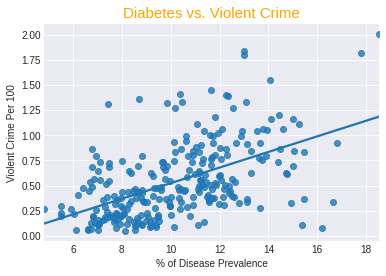

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Diabetes vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = diabetes_crime['% of Disease Prevalence'], y = diabetes_crime['Violent Crime Per 100'], data = diabetes_crime, ci=None)

In [ ]:
corr, _ = pearsonr(diabetes_crime['Violent Crime Per 100'], diabetes_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.529


In [ ]:
diabetes_crime.nlargest(10, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
72,Detroit_MI,18.525850,MI,Detroit,671275.0,13478.0,261,988,"2,309","9,920","28,897","7,440","15,003","6,454",2.007821
83,Flint_MI,17.775610,MI,Flint,95677.0,1739.0,32,130,189,"1,388","2,584",796,"1,488",300,1.817574
67,Dayton_OH,16.791525,OH,Dayton,140094.0,1291.0,37,167,403,684,"6,323","1,697","3,831",795,0.921524
116,Laredo_TX,16.618644,TX,Laredo,264214.0,890.0,10,145,141,594,"6,367",692,"5,506",169,0.336848
131,McAllen_TX,16.170370,TX,McAllen,144363.0,122.0,0,39,26,57,"3,856",203,"3,598",55,0.084509
219,Shreveport_LA,15.467213,LA,Shreveport,190808.0,1588.0,49,123,335,"1,081","9,884","1,832","7,241",811,0.832250
74,El Paso_TX,15.447368,TX,El Paso,688442.0,2554.0,23,405,376,"1,750","10,365","1,107","8,441",817,0.370983
142,Mission_TX,15.358824,TX,Mission,85368.0,94.0,0,35,27,32,"1,594",150,"1,380",64,0.110112
2,Albany_GA,15.259259,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
244,Toledo_OH,15.024752,OH,Toledo,275023.0,2333.0,37,239,477,"1,580","10,222","2,802","6,712",708,0.848293


## Chronic Kidney Disease vs. Violent Crime

In [ ]:
kidney = pd.read_csv('500_Cities__Chronic_kidney_disease_among_adults_aged___18_years.csv')
kidney = kidney.drop(['Unnamed: 15', 'Unnamed: 16','Unnamed: 17'], 1)
kidney.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit
0,2017,GA,Georgia,Columbus,Census Tract,BRFSS,Health Outcomes,1319000-13215010502,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.5,3.1,3.8
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003009400,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.7,3.5,3.9
2,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003011300,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.6,3.5,3.8
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003006302,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,4.6,4.4,4.9
4,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003005800,Chronic kidney disease among adults aged >=18 ...,%,CrdPrv,Crude prevalence,3.5,3.3,3.8


In [ ]:
kidney= kidney.dropna(how='any',axis=0)
kidney['CityName_ST'] = kidney['CityName'] + '_' + kidney['StateAbbr']
kidney_gr = kidney.groupby(['CityName_ST'])
kidney_average = kidney_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
kidney_average.head()

,CityName_ST,% of Disease Prevalence
0,Abilene_TX,3.092308
1,Akron_OH,3.661765
2,Alameda_CA,2.616667
3,Albany_GA,4.074074
4,Albany_NY,2.971429


In [ ]:
kidney_crime = pd.merge(kidney_average, city_crime, how='inner', on = 'CityName_ST')
kidney_crime.head()

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,Abilene_TX,3.092308,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,3.661765,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,4.074074,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,2.971429,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,3.016547,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


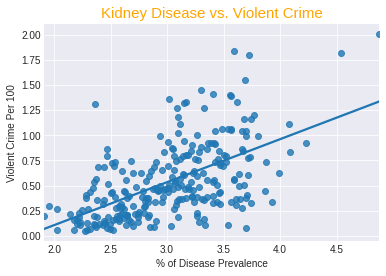

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Kidney Disease vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = kidney_crime['% of Disease Prevalence'], y = kidney_crime['Violent Crime Per 100'], data = kidney_crime, ci=None)

In [ ]:
corr, _ = pearsonr(kidney_crime['Violent Crime Per 100'], kidney_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.575


In [ ]:
kidney_crime.nlargest(10, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
72,Detroit_MI,4.875170,MI,Detroit,671275.0,13478.0,261,988,"2,309","9,920","28,897","7,440","15,003","6,454",2.007821
83,Flint_MI,4.536585,MI,Flint,95677.0,1739.0,32,130,189,"1,388","2,584",796,"1,488",300,1.817574
67,Dayton_OH,4.232203,OH,Dayton,140094.0,1291.0,37,167,403,684,"6,323","1,697","3,831",795,0.921524
219,Shreveport_LA,4.086885,LA,Shreveport,190808.0,1588.0,49,123,335,"1,081","9,884","1,832","7,241",811,0.832250
2,Albany_GA,4.074074,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
137,Miami_FL,3.989320,FL,Miami,473047.0,2978.0,46,131,828,"1,973","16,837","2,057","13,136","1,644",0.629536
116,Laredo_TX,3.932203,TX,Laredo,264214.0,890.0,10,145,141,594,"6,367",692,"5,506",169,0.336848
113,Lake Charles_LA,3.875000,LA,Lake Charles,77852.0,575.0,6,55,134,380,"3,777","1,845","1,638",294,0.738581
265,Yakima_WA,3.866667,WA,Yakima,93959.0,421.0,16,49,121,235,"3,343",625,"2,212",506,0.448068
227,Springfield_MA,3.802564,MA,Springfield,155179.0,1534.0,19,104,475,936,"4,089",910,"2,752",427,0.988536


## Alcohol Consumption vs. Violent Crime

In [ ]:
alcohol = pd.read_csv('500_Cities__Binge_drinking_among_adults_aged_new.csv')
alcohol.shape
alcohol= alcohol.dropna(how='any',axis=0)
alcohol['CityName_ST'] = alcohol['CityName'] + '_' + alcohol['StateAbbr']
alcohol_gr = alcohol.groupby(['CityName_ST'])
alcohol_average = alcohol_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
alcohol_average.head()
alcohol_crime = pd.merge(alcohol_average, city_crime, how='inner', on = 'CityName_ST')
alcohol_crime.head()

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,Abilene_TX,19.282051,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,16.270588,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,11.748148,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,18.532143,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,16.058273,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


In [ ]:
alcohol_crime.nsmallest(20, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
165,Orem_UT,7.740000,UT,Orem,99221.0,69.0,1,20,12,36,"1,827",152,"1,576",99,0.069542
229,St. George_UT,9.786667,UT,St. George,86202.0,196.0,3,48,19,126,"1,388",228,"1,049",111,0.227373
161,Ogden_UT,11.661538,UT,Ogden,87616.0,417.0,5,74,81,257,"3,218",500,"2,319",399,0.475940
2,Albany_GA,11.748148,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
49,Charleston_WV,11.879167,WV,Charleston,47470.0,331.0,10,50,48,223,"2,853",660,"1,947",246,0.697282
97,Hartford_CT,12.814286,CT,Hartford,123117.0,1313.0,21,53,355,884,"4,435",605,"3,089",741,1.066465
139,Milpitas_CA,13.047059,CA,Milpitas,79895.0,87.0,0,11,45,31,"1,934",243,"1,435",256,0.108893
34,Boynton Beach_FL,13.069231,FL,Boynton Beach,79142.0,477.0,4,21,134,318,"2,964",256,"2,423",285,0.602714
145,Montgomery_AL,13.233871,AL,Montgomery,198662.0,1216.0,29,39,391,757,"8,480","2,052","5,456",972,0.612095
72,Detroit_MI,13.375850,MI,Detroit,671275.0,13478.0,261,988,"2,309","9,920","28,897","7,440","15,003","6,454",2.007821


## Appleton, Wisconsin has earned the reputation for being the drunkest city in America [link text](https://www.fox6now.com/news/appleton-named-drunkest-city-in-america-seven-wisconsin-cities-in-the-top-10)

The top cities are around colleges which could explain part of the binge drinking statistics. The binge drinking study also does not offer any indication as to how long someone engages in binbe drinking behaviors so it may not be the best indicator of the health of a city.

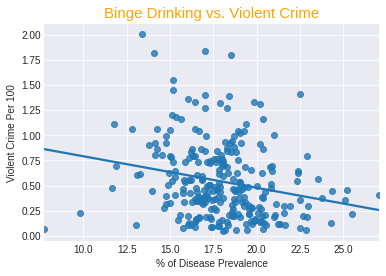

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Binge Drinking vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = alcohol_crime['% of Disease Prevalence'], y = alcohol_crime['Violent Crime Per 100'], data = alcohol_crime, ci=None)

In [ ]:
corr, _ = pearsonr(alcohol_crime['Violent Crime Per 100'], alcohol_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.221


## Obesity & Violent Crime

In [ ]:
obesity = pd.read_csv('500_Cities__Obesity_among_adults_aged___18_years.csv')
obesity.head()
# alcohol = alcohol.drop(['Unnamed: 15', 'Unnamed: 16','Unnamed: 17'], 1)
obesity['CityName_ST'] = obesity['CityName'] + '_' + obesity['StateAbbr']
obesity= obesity.dropna(how='any',axis=0)
obesity_gr = obesity.groupby(['CityName_ST'])
obesity_average = obesity_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
obesity_average.head()
obesity_crime = pd.merge(obesity_average, city_crime, how='inner', on = 'CityName_ST')
obesity_crime.head()

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
0,Abilene_TX,33.838462,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,38.142647,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,41.255556,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,29.760714,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,26.787050,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


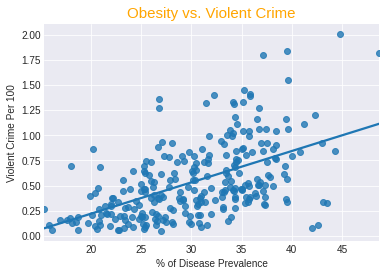

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Obesity vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = obesity_crime['% of Disease Prevalence'], y = obesity_crime['Violent Crime Per 100'], data = obesity_crime, ci=None)

In [ ]:
corr, _ = pearsonr(obesity_crime['Violent Crime Per 100'], obesity_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.534


In [ ]:
print(obesity_crime['CityName_ST'])

0          Abilene_TX
1            Akron_OH
2           Albany_GA
3           Albany_NY
4      Albuquerque_NM
            ...      
262        Wichita_KS
263     Wilmington_DE
264      Worcester_MA
265         Yakima_WA
266           Yuma_AZ
Name: CityName_ST, Length: 267, dtype: object


In [ ]:
obesity_crime.nlargest(10, '% of Disease Prevalence')

,CityName_ST,% of Disease Prevalence,STATE,Counties/principal cities,Population,Violent\rcrime,Murder and\rnonnegligent\rmanslaughter,Rape1,Robbery,Aggravated\rassault,Property\rcrime,Burglary,Larceny-\rtheft,Motor\rvehicle\rtheft,Violent Crime Per 100
83,Flint_MI,48.678049,MI,Flint,95677.0,1739.0,32,130,189,"1,388","2,584",796,"1,488",300,1.817574
72,Detroit_MI,44.812245,MI,Detroit,671275.0,13478.0,261,988,"2,309","9,920","28,897","7,440","15,003","6,454",2.007821
244,Toledo_OH,44.304950,OH,Toledo,275023.0,2333.0,37,239,477,"1,580","10,222","2,802","6,712",708,0.848293
73,Edinburg_TX,43.446667,TX,Edinburg,92391.0,304.0,2,78,50,174,"3,248",418,"2,756",74,0.329036
116,Laredo_TX,43.064407,TX,Laredo,264214.0,890.0,10,145,141,594,"6,367",692,"5,506",169,0.336848
67,Dayton_OH,42.967797,OH,Dayton,140094.0,1291.0,37,167,403,684,"6,323","1,697","3,831",795,0.921524
142,Mission_TX,42.623529,TX,Mission,85368.0,94.0,0,35,27,32,"1,594",150,"1,380",64,0.110112
41,Canton_OH,42.310714,OH,Canton,70605.0,845.0,3,98,189,555,"3,790",970,"2,517",303,1.196799
131,McAllen_TX,41.962963,TX,McAllen,144363.0,122.0,0,39,26,57,"3,856",203,"3,598",55,0.084509
2,Albany_GA,41.255556,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417


## Smoking and Violent Crime

In [ ]:
smoke = pd.read_csv('500_Cities__Current_smoking_among_adults_aged___18_years.csv')
smoke.head()
smoke = smoke.drop(['Data_Value_Unit', 'DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount','CategoryID','CityFIPS', 'MeasureId', 'TractFIPS', 'Short_Question_Text'], 1)
smoke['CityName_ST'] = smoke['CityName'] + '_' + smoke['StateAbbr']
smoke= smoke.dropna(how='any',axis=0)
smoke_gr = smoke.groupby(['CityName_ST'])
smoke_average = smoke_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
smoke_average.head()
smoke_crime = pd.merge(smoke_average, city_crime, how='inner', on = 'CityName_ST')
smoke.head()

(267, 15)

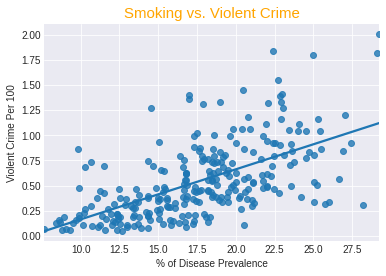

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Smoking vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = smoke_crime['% of Disease Prevalence'], y = smoke_crime['Violent Crime Per 100'], data = smoke_crime, ci=None)

In [ ]:
corr, _ = pearsonr(smoke_crime['Violent Crime Per 100'], smoke_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.605


## Stroke vs. Violent Crime

In [ ]:
stroke = pd.read_csv('500_Cities__Stroke_among_adults_aged___18_years.csv')
stroke.head()
stroke = stroke.drop(['Data_Value_Unit', 'DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount','CategoryID','CityFIPS', 'MeasureId', 'TractFIPS', 'Short_Question_Text'], 1)
stroke['CityName_ST'] = stroke['CityName'] + '_' + stroke['StateAbbr']
stroke= stroke.dropna(how='any',axis=0)
stroke_gr = stroke.groupby(['CityName_ST'])
stroke_average = stroke_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
stroke_average.head()
stroke_crime = pd.merge(stroke_average, city_crime, how='inner', on = 'CityName_ST')
stroke.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,GeoLocation,CityName_ST
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003006201,Stroke among adults aged >=18 Years,3.4,3.1,3.7,"(21.3388990175, -157.879157799)",Honolulu_HI
1,2017,GA,Georgia,Columbus,Census Tract,BRFSS,Health Outcomes,1319000-13215010201,Stroke among adults aged >=18 Years,2.1,1.9,2.3,"(32.5841000369, -84.9893087254)",Columbus_GA
3,2017,GA,Georgia,Warner Robins,Census Tract,BRFSS,Health Outcomes,1380508-13153021104,Stroke among adults aged >=18 Years,2.7,2.4,3.0,"(32.6066851404, -83.6814795438)",Warner Robins_GA
4,2017,GA,Georgia,Macon,Census Tract,BRFSS,Health Outcomes,1349000-13021013102,Stroke among adults aged >=18 Years,6.1,5.6,6.8,"(32.7942890489, -83.6917195326)",Macon_GA
5,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Health Outcomes,15003003700,Stroke among adults aged >=18 Years,2.3,2.1,2.5,"(21.2927377569, -157.847451745)",Honolulu_HI


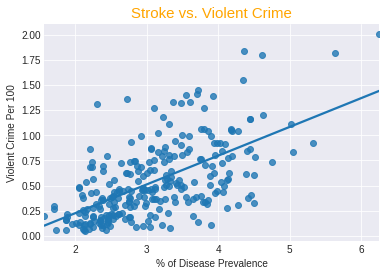

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Stroke vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = stroke_crime['% of Disease Prevalence'], y = stroke_crime['Violent Crime Per 100'], data = stroke_crime, ci=None)

In [ ]:
corr, _ = pearsonr(heart_crime['Violent Crime Per 100'], heart_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.426


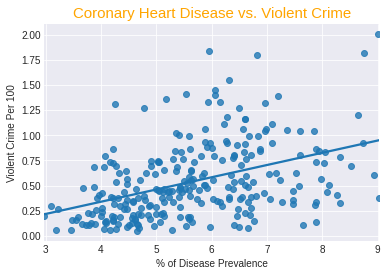

In [ ]:
plt.title("Coronary Heart Disease vs. Violent Crime", fontsize=15, fontweight=5, color='orange')
ax1 = sns.regplot(x = heart_crime['% of Disease Prevalence'], y = heart_crime['Violent Crime Per 100'], data = heart_crime, ci=None)

In [ ]:
corr, _ = pearsonr(stroke_crime['Violent Crime Per 100'], stroke_crime['% of Disease Prevalence'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.607


In [ ]:
stroke_crime.nlargest(20, '% of Disease Prevalence')

In [ ]:
heart_crime.nlargest(10, '% of Disease Prevalence')

##This was just me trying to understand why stroke rates have a higher correlatio that coronary heart disease

In [ ]:
test = pd.merge(stroke_crime, heart_crime, how='inner', on = 'CityName_ST')
test.head()

,CityName_ST,% of Disease Prevalence_x,STATE_x,Counties/principal cities_x,Population_x,Violent\rcrime_x,Murder and\rnonnegligent\rmanslaughter_x,Rape1_x,Robbery_x,Aggravated\rassault_x,Property\rcrime_x,Burglary_x,Larceny-\rtheft_x,Motor\rvehicle\rtheft_x,Violent Crime Per 100_x,% of Disease Prevalence_y,STATE_y,Counties/principal cities_y,Population_y,Violent\rcrime_y,Murder and\rnonnegligent\rmanslaughter_y,Rape1_y,Robbery_y,Aggravated\rassault_y,Property\rcrime_y,Burglary_y,Larceny-\rtheft_y,Motor\rvehicle\rtheft_y,Violent Crime Per 100_y
0,Abilene_TX,3.233333,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528,6.289744,TX,Abilene,122480.0,591.0,8,97,104,382,"3,528",734,"2,561",233,0.482528
1,Akron_OH,4.445588,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956,7.883824,OH,Akron,197690.0,1704.0,38,221,387,"1,058","7,159","1,740","4,701",718,0.861956
2,Albany_GA,5.022222,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417,7.081481,GA,Albany,72594.0,809.0,15,28,113,653,"3,704",760,"2,666",278,1.114417
3,Albany_NY,3.157143,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046,5.442857,NY,Albany,98322.0,823.0,12,52,209,550,"3,147",432,"2,585",130,0.837046
4,Albuquerque_NM,2.716547,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784,5.176978,NM,Albuquerque,560235.0,7646.0,69,479,"1,979","5,119","34,619","6,378","21,625","6,616",1.364784


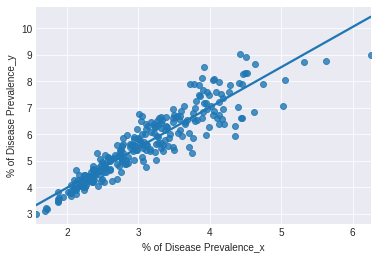

In [ ]:
ax1 = sns.regplot(x = test['% of Disease Prevalence_x'], y = test['% of Disease Prevalence_y'], data = test, ci=None)

In [ ]:
corr, _ = pearsonr(test['% of Disease Prevalence_x'], test['% of Disease Prevalence_y'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.921


## Cholesterol Screenings

In [ ]:
cholesterol = pd.read_csv('500_Cities__Cholesterol_screening_among_adults_aged___18_years.csv')
cholesterol.head()
cholesterol = cholesterol.drop(['Data_Value_Unit', 'DataValueTypeID','Data_Value_Type','Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'PopulationCount','CategoryID','CityFIPS', 'MeasureId', 'TractFIPS', 'Short_Question_Text'], 1)
cholesterol['CityName_ST'] = cholesterol['CityName'] + '_' + cholesterol['StateAbbr']
cholesterol= cholesterol.dropna(how='any',axis=0)
cholesterol_gr = cholesterol.groupby(['CityName_ST'])
cholesterol_average = cholesterol_gr['Data_Value'].mean().to_frame(name='% of Disease Prevalence').reset_index()
cholesterol_average.head()
cholesterol_crime = pd.merge(cholesterol_average, city_crime, how='inner', on = 'CityName_ST')
cholesterol.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,GeoLocation,CityName_ST
0,2017,GA,Georgia,Macon,Census Tract,BRFSS,Prevention,1349000-13021012101,Cholesterol screening among adults aged >=18 Y...,79.5,77.1,81.4,"(32.867877314, -83.7084580931)",Macon_GA
1,2017,ID,Idaho,Nampa,Census Tract,BRFSS,Prevention,1656260-16027020901,Cholesterol screening among adults aged >=18 Y...,75.2,73.3,77.1,"(43.5398107837, -116.537433492)",Nampa_ID
2,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Prevention,15003008402,Cholesterol screening among adults aged >=18 Y...,79.2,78.2,80.2,"(21.3147061444, -158.010264458)",Honolulu_HI
3,2017,GA,Georgia,Sandy Springs,Census Tract,BRFSS,Prevention,1368516-13121010110,Cholesterol screening among adults aged >=18 Y...,84.0,82.7,85.1,"(33.9204281723, -84.3620299679)",Sandy Springs_GA
4,2017,ID,Idaho,Boise City,Census Tract,BRFSS,Prevention,1608830-16001001500,Cholesterol screening among adults aged >=18 Y...,75.3,73.5,77.1,"(43.5948630356, -116.218329034)",Boise City_ID


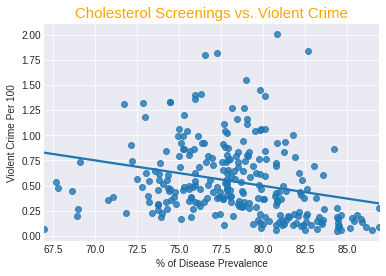

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.title("Cholesterol Screenings vs. Violent Crime", fontsize=15, fontweight=5, color='orange')

import seaborn as sns

ax1 = sns.regplot(x = cholesterol_crime['% of Disease Prevalence'], y = cholesterol_crime['Violent Crime Per 100'], data = cholesterol_crime, ci=None)

In [ ]:
corr, _ = pearsonr(cholesterol_crime['% of Disease Prevalence'], cholesterol_crime['Violent Crime Per 100'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.256


In [ ]:
cholesterol_crime[cholesterol_crime['CityName_ST']==Detroit_MI]

NameError: ignored